# Bank Marketing Campaign Success Prediction
## Part 1: Machine Learning Approach

### *Input variables:*
### bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired',
'self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br> 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br> 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

### *Output variable (desired target):*<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



Let's start by installing some basic packages. Here the command *%matplotlib inline* will show the plots within this notebook. The Seaborn packages right after that makes plots look better and has some additional functionalities

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#This will make matplotlib plots looks better and add additional plot types:
import seaborn as sns

## Exploratory Data Analysis
We start by importing the csv file as a pandas dataframe. Then we check the shape of the data and retrieve some basic statistics by using the "describe" function. We also check if there are missing values in the data.

In [2]:
full_data = pd.read_csv("./bank-additional/bank-additional-full.csv", sep = ";")
#full_data.head()
print("Shape of data:", full_data.shape)
print(list(full_data))
print(full_data.describe())
print(full_data['y'].head())
full_data.isnull().sum()

Shape of data: (41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [3]:
print(full_data.dtypes.value_counts())
print(full_data.select_dtypes(['object']).nunique())

object     11
float64     5
int64       5
dtype: int64
job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64
0    0.887346
1    0.112654
Name: y, dtype: float64


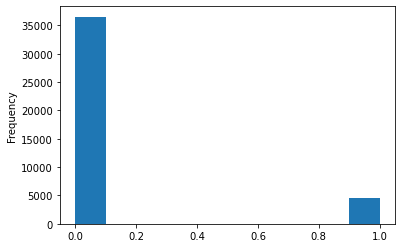

In [4]:
full_data.y.replace(('yes', 'no'), (1, 0), inplace = True)
print(full_data['y'].head())
print(full_data['y'].value_counts(normalize = True))
full_data['y'].astype(int).plot.hist()
plt.show()

### A comment on minimum acceptable accuracy based on distribution of dependent variable

In the above plot we can see that roughly 89% of the clients didn't subscribe for the term deposit and 11% clients did.Thus, in statistical terminology, the prior probability of not subscribing is 0.89. Here we can get a clue on what should be the minimum acceptable accuracy for our models. Someone can build a model with no features (called a null model) like this, y = 0 and still can achieve an accuracy of 89%. Thus, such a model will always predict that there will be no subscriptions and still will be correct 89% of time. So, to build a useful model we need to have an accuracy of greater than 89% otherwise it will be no better than the model which will always predict no.

So, an important lesson here is that if we have a binary classification problem then we can infer the minimum required accuracy just by plotting the distribution of the dependent variable. This minimum accuracy requirement will vary depending on the problems but we can always plot and see what should be the minimum acceptable accuracy. In a more extreme example, imagine a model that predicts cancer. May be 98% of population do not have cancer and to be an informative model the acceptable accuracy must have to be greater than 98%. Because, a null model which always predicts no cancer will be able to achieve an accuracy of 98%.

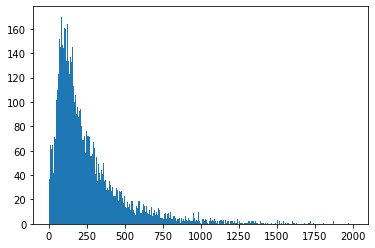

In [5]:
#full_data['duration'].plot.hist()
plt.hist(full_data['duration'], bins = range(0,2000))
plt.show()

y          0    1
month            
apr     2093  539
aug     5523  655
dec       93   89
jul     6525  649
jun     4759  559
mar      270  276
may    12883  886
nov     3685  416
oct      403  315
sep      314  256


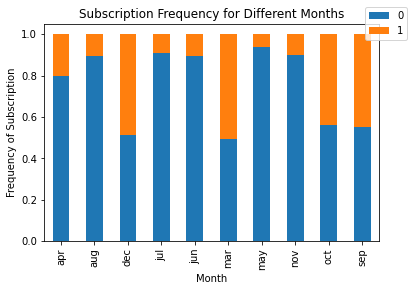

In [6]:
month_y_table =pd.crosstab(full_data.month,full_data.y)
print(month_y_table)
month_y_table.div(month_y_table.sum(1), axis=0).plot(kind='bar', stacked=True)
plt.title('Subscription Frequency for Different Months')
plt.xlabel('Month')
plt.ylabel('Frequency of Subscription')
plt.legend(loc=1, bbox_to_anchor=(1.1, 1.1))
plt.show()

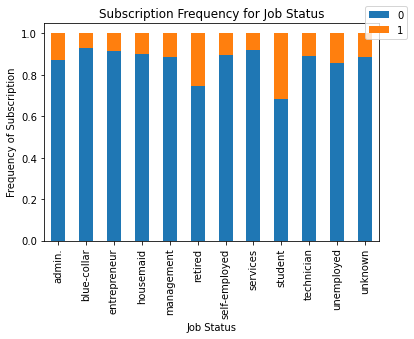

In [7]:
job_y_table=pd.crosstab(full_data.job,full_data.y)
job_y_table.div(job_y_table.sum(1), axis=0).plot(kind='bar', stacked=True)
plt.title('Subscription Frequency for Job Status')
plt.xlabel('Job Status')
plt.ylabel('Frequency of Subscription')
plt.legend(loc=1, bbox_to_anchor=(1.1, 1.1))
plt.show()

## Data Preprocessing
Now, we have 10 features with string categories. We need to encode string categories to numerical labels before running any model. *get_dummies* function does this for us in a single line. *get_dummies* converts string variables to dummy variables aka indicator variables (it is similar to one hot encoding). Other options could be one-hot encoding or label encoding. The problem of label encoding is that it creates an ordinal relation among the categories which is not desired. 

After converting to dummy variables we drop one category from each feature to prevent multicollinearity, a property which would cause problem in model inference and in some cases for prediction if multicollinearity is severe.<br>

### Multicollinearity
Multicollinearity is a condition when two independent variables are correlated or if independent variables are linearly dependent. For severe multicollinearity the regression model should fail. To put in very simple term, realize that if two variables are same or very similar then we will have redundancy in our model. We cannot distunguish the impact of the variables individually. <br>

#### Multicollinearity due to dummy variable trap
Here, we have a variable called *previous outcome (poutcome)*. It has 3 categories: *success, failure, nonexistent*. We need to use any two of these three categories in our model. Let's see why we do not need all three categories:<br>

If we use dummy variable then we convert each category to yes (1), no(0) indicators. If for previous outcome, success = 0, failure = 0, then we obviously know that nonexistent = 1 for this particular data. Similarly, if we know that success =0, nonexistent = 0, then it must be that failure = 1. Hence, if we know value of any two categories we can estimate the value of the third category. Thus to prevent this linear dependency and the resulting perfect multicollinearity we drop one category from each categorical variables.

In total there are  53 categories for 10 of our categorical variables.
We have total 21-10+53 = 64 variables after dummy variable conversion
As we drop one category from each feature eventually we have 64-10 = 54 variables
We confirm this by checking the shape of the data again. We can also check first few values to confirm the change.

In [8]:
# Using drop_first to drop a category to prevent multicollinearity
full_data_dummy = pd.get_dummies(full_data, drop_first = True)

print(full_data_dummy.shape)
print(list(full_data_dummy))
full_data_dummy.head(5)

(41188, 54)
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


Let's check if there are any significant correlations between output variable and input variables.
Although duration has some correlation with the y variable but we cannot conclude any causation here due to the fact the until the call is made we do not know what would be the duration. And to make a new call to an unseen client this data will not be useful.

In [9]:
correlations = full_data_dummy.corr()['y'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(6))
print('\nMost Negative Correlations:\n', correlations.head(6))

Most Positive Correlations:
 month_oct           0.137366
month_mar           0.144014
previous            0.230181
poutcome_success    0.316269
duration            0.405274
y                   1.000000
Name: y, dtype: float64

Most Negative Correlations:
 nr.employed            -0.354678
pdays                  -0.324914
euribor3m              -0.307771
emp.var.rate           -0.298334
poutcome_nonexistent   -0.193507
contact_telephone      -0.144773
Name: y, dtype: float64


Separating the dependent variable y from the indepenent variables:

In [10]:
# Creating separate vector for the output variable
y_label = full_data_dummy['y']
######## Independent variables before scaling ######
x_vars = full_data_dummy.drop(['y'], axis =1)
print(x_vars.dtypes.value_counts())

features = list(x_vars)

uint8      43
float64     5
int64       5
dtype: int64


### Splitting the data into train and test parts
At first we split the data into training and testing sets before we build the models

In [12]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x_vars, y_label, test_size=0.3, random_state=0)

## Model Building
We are going to run the following models:<br>
1. Logistic Regression
2. Random Forest : This is an enhanced bagging (bootstrap aggregating) technique involving decision trees. Being an ensemble model it performs well compared to a single decision tree and reduces overfitting.
3. XGBoost: One of the most powerful algorithms for tabular data. It is a boosting techniques where we have some weak learners (e.g. small decision trees) that we combine together to build a strong learner. It is also an ensemble technique.
4. Support Vector Machine: It uses a technique called kernel trick to project data in some higher dimensions so that it can separate the classes linearly when such separation is not possible in current dimension.
5. Neural Networks

### Logistic Regression

In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

logreg = LogisticRegression()
print(logreg.fit(X_train, y_train))
predictions = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy of logistic regression classifier on test set: 0.9108
[[10686   283]
 [  819   569]]
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     10969
          1       0.67      0.41      0.51      1388

avg / total       0.90      0.91      0.90     12357



### ROC Plot for Logistic Regression Prediction

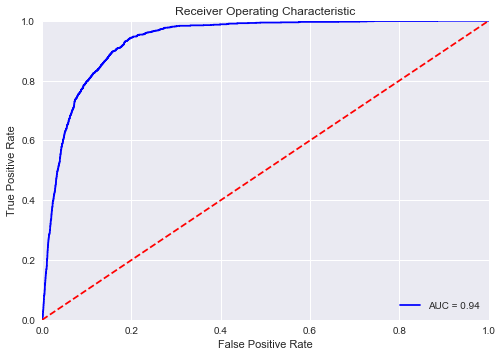

In [18]:
from sklearn import metrics
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest

In [23]:
######## RANDOM FOREST###########
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 0, n_jobs = -1)

In [24]:
## RF Train on the training data
random_forest.fit(X_train, y_train)

# We can extract feature importances from RF:
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
#print(feature_importances)

# Make predictions on the test data
predictions = random_forest.predict_proba(X_test)[:, 1]
random_forest.score(X_test, y_test)
print("Accuracy of RF:",random_forest.score(X_test, y_test))

Accuracy of RF: 0.913814032532


### XGBoost

In [25]:
######### XGBoost #########
from xgboost import XGBClassifier

modelx = XGBClassifier()
modelx.fit(X_train, y_train)

print("Accuracy of XGBoost:", modelx.score(X_test, y_test))

Accuracy of XGBoost: 0.919397912115


### ROC Plot for XGBoost after scaling

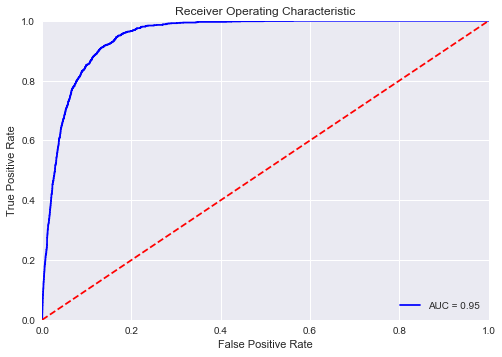

In [26]:
probs = modelx.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Support Vector Machine

In [27]:
############## SUPPORT VECTOR MACHINE ########
from sklearn import svm

# Create SVM classifier object 
modelsvm = svm.SVC(kernel='linear', C=1, gamma=1, random_state = 0) 

modelsvm.fit(X_train, y_train)
print("Accuracy of SVM model:",modelsvm.score(X_test, y_test))
#predictedsvm= modelsvm.predict(x_test)

Accuracy of SVM before scaling: 0.899409241725


### Shallow Neural Network

In [75]:
########### Neural Network with 2 layers ###########
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(15),max_iter=500, random_state=0)
print(mlp.fit(X_train,y_train))

accuracynn = mlp.score(X_test, y_test)
print("Accuracy of 2 layer NN model:", accuracynn)

#predictions = mlp.predict(X_test)
#print(classification_report(y_test,predictions))

#print(confusion_matrix(y_test,predictions))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
Accuracy of 2 layer NN before scaling: 0.892773326859


### Deep Neural Network

In [82]:
########### Neural Network 4 layers ###########
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(15,15,15),max_iter=500, random_state = 0)

print(mlp.fit(X_train,y_train))

accuracynn = mlp.score(X_test, y_test)
print("Accuracy of 4 layer NN model:", accuracynn)

#predictions = mlp.predict(X_test1)
#print(classification_report(y_test1,predictions))

#print(confusion_matrix(y_test1,predictions))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
Accuracy of 4 layer NN after scaling: 0.914866067816


## Concluding Remarks
Finally, we can see that XGBoost is performing well for this problem when we use off-the-shelf models. If we use paramter tuning then we might get little different results than this. But, it is important to remember that data cleaning and feature engineering are much more important than parameter tuning. Usually we obtain major improvements by feature engineering and data cleaning rather from parameter tuning.

Another important point to mention is that although for this particular problem XGBoost performed well, it does not necessarily mean that it will always perform well in all problems. XGBoost is a great model for tabular/structured data like we have in this current problem. But, for NLP and computer vision problems we might see use of deep learning would produce better results if we have sufficiently large datasets. 

Moreover, if objective is to identify which variables indicate probability of campaign success then we need glassbox models like Logistic regression or decision trees. To achieve that objective, inference is more important than prediction. For large naumber of features, logistic regression is better than decision trees to get good inference as large trees are difficult to visualize and navigate. So, from the perspective of getting inference, Logistic Regression would be the best model despite its low accuracy. Slides show details on how we get inference from a logistic regression models.

Again, please keep in mind that this policy of "No free lunch" holds for any machine learning algorithms.